**Image Classification Using Convolutional Neural Network**

**-- Harshith Raj P**

The primary objective of this project is to design and construct an adept architecture for a Convolutional Neural Network (CNN) using the TensorFlow framework.

For the purpose of the project, we shall use the MNIST Dataset which contains 60000 images in the training set and 20000 images in the testing set. All these images have labels belonging to 10 categories from 0 to 9.

We shall also do some kind of a preprocesing and visual inspection of the MNIST Dataset.

The Architecture used for the CNN below is structured as shown:

-- Input Layer with shape of (28,28,1)

-- Conv2D Layer with 32 filters of size 5x5

-- MaxPool2D Layer which is a downsampling filter (2x2)

-- DropOut Layer which is a regularization feature for prevention of overfitting

-- Another Conv2D Layer, this time with 64 filters of size 3x3

-- MaxPool2D Layer (2x2)

-- DropOut Layer

The output from the final layer will first be flattened and then sent into a 2 Layer Feed-Forward Neural Network:

-- Dense Layer of 128 Nodes with **relu** activation function

-- Another DropOut Layer for regularization

-- Dense Output Layer of 10 Nodes (Output Classes) with **softmax** activation function

We shall compile the above model using an RMSprop Optimizer with an epsilon value of **1e-08** and calculate loss in the form of Cross Entropy.

Import the necessary libraries as shown:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Check the dimensions and basic characteristics of the dataset:

In [3]:
print("Training data shape:", x_train.shape)
print("Number of training samples:", x_train.shape[0])
print("Image shape:", x_train[0].shape)
print("Labels:", np.unique(y_train))
print("Number of classes:", len(np.unique(y_train)))

Training data shape: (60000, 28, 28)
Number of training samples: 60000
Image shape: (28, 28)
Labels: [0 1 2 3 4 5 6 7 8 9]
Number of classes: 10


Display a few sample images from the dataset:

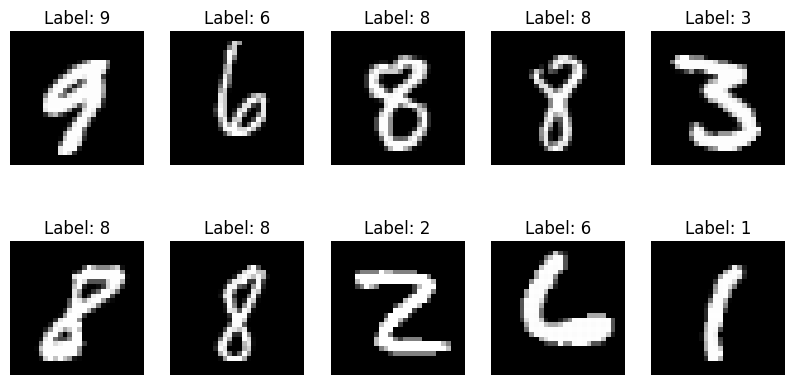

In [4]:
import random

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    ind = random.randint(0, x_train.shape[0])
    plt.imshow(x_train[ind], cmap='gray')
    plt.title(f"Label: {y_train[ind]}")
    plt.axis('off')
plt.show()

Visualize the distribution of labels in the training set:

Distribution:
0
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


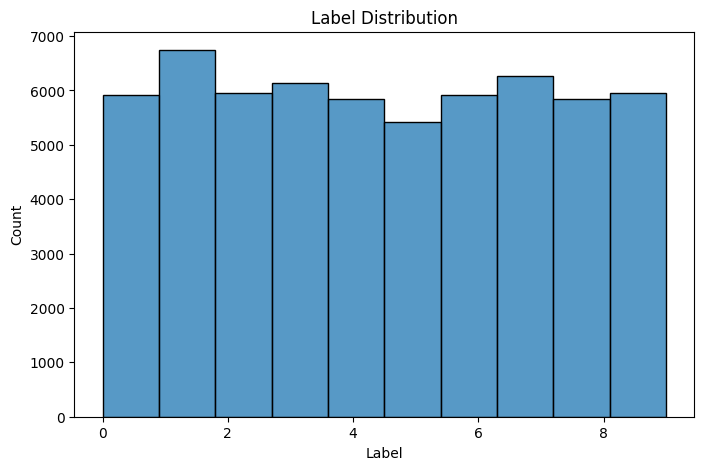

In [5]:
print(f"Distribution:\n{pd.DataFrame(y_train).value_counts().sort_index()}")
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=10)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()

**Data Preprocessing:**
Reshape the input array and normalize the pixel values to a range between 0 and 1.

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train/255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test/255.0

Next, convert the labels to one-hot encodings. This makes the labels more continuous than categorical.

In [7]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

Now, let's focus on building the Architecture for the CNN Model.

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08),loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Harshith Raj\anaconda3\envs\ml2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now fit the obtained data to the model:

Testing the model on a validation dataset prevents overfitting of the data. We specified a 10% validation and 90% training split.

In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9287 - loss: 0.2320 - val_accuracy: 0.9867 - val_loss: 0.0473
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9725 - loss: 0.0933 - val_accuracy: 0.9887 - val_loss: 0.0358
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9786 - loss: 0.0738 - val_accuracy: 0.9900 - val_loss: 0.0382
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9789 - loss: 0.0738 - val_accuracy: 0.9908 - val_loss: 0.0302
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9797 - loss: 0.0704 - val_accuracy: 0.9900 - val_loss: 0.0302
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9810 - loss: 0.0683 - val_accuracy: 0.9902 - val_loss: 0.0344
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9813 - loss: 0.0695 - val_accuracy: 0.9878 - val_loss: 0.0536
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9813 - loss: 0

We keep track of the Validation Loss and Accuracy and compare it with the Training Loss and Accuracy as shown below:

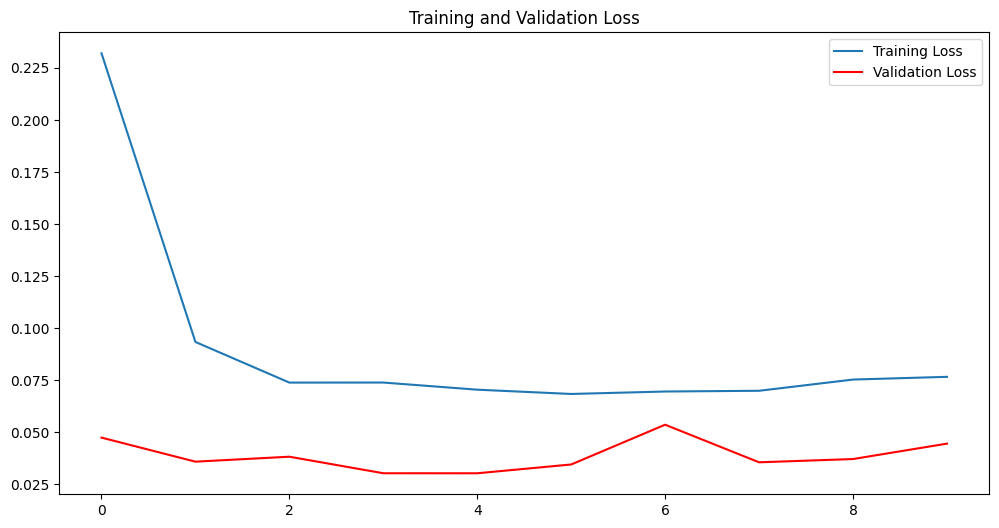

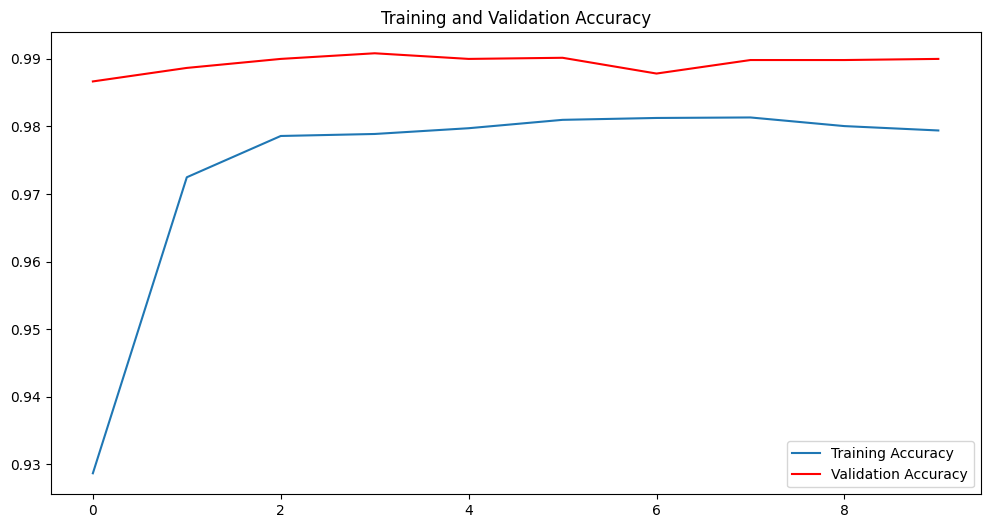

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=history.history['loss'],label='Training Loss')
sns.lineplot(data=history.history['val_loss'],color='r',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=history.history['accuracy'],label='Training Accuracy')
sns.lineplot(data=history.history['val_accuracy'],color='r',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend(loc='best')
plt.show()

The accuracy increases over time and the loss decreases over time. However, the accuracy of our validation set seems to slightly decrease towards the end even thought our training accuracy increased. Running the model for more epochs might cause our model to be susceptible to overfitting.

**Model Prediction and Confusion Matrix:**

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {round(test_acc*100, 2)}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9903 - loss: 0.0334
Test Loss: 0.03336687013506889
Test Accuracy: 99.03%


In [12]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[ 975    0    0    0    1    0    2    1    1    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   2    5 1016    1    1    0    1    3    2    1]
 [   0    0    0 1005    0    3    0    1    1    0]
 [   0    0    0    0  980    0    0    0    1    1]
 [   2    0    0    5    0  881    2    1    0    1]
 [   5    5    1    0    4    2  939    0    2    0]
 [   0    7    5    1    1    0    0 1012    0    2]
 [   0    2    0    0    0    0    0    0  970    2]
 [   0    1    0    1    7    2    0    1    6  991]]


<Axes: >

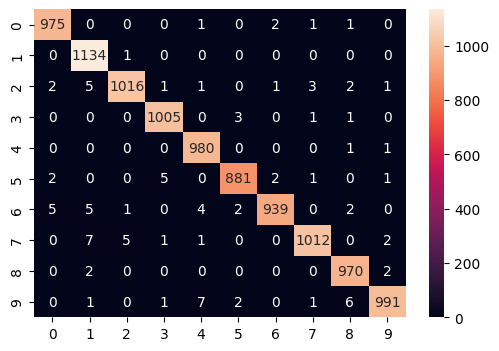

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')

**Conclusion:**

We have successfully built a CNN Model which was able to predict Mnist Images to an accuracy of 98.98%.